<h1>Getting datasets from google drive to workspace </h1>

In [1]:
dataset_dir = 'NewImages'
train_dataset_dir = 'NewImages/train'
test_dataset_dir = 'NewImages/test'

In [ ]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [2]:
train_dir='NewImages/train'
test_dir = 'NewImages/test'

In [3]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:

def train_test_splits(data_directory):
  i=0
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [6]:
import os

source_directory = "/NewImages/train/spoof"

if not os.path.exists(source_directory):
    print(f"Error: Directory '{source_directory}' does not exist!")
else:
    print("Directory exists. Listing files:")
    print(os.listdir(source_directory))


Error: Directory '/NewImages/train/spoof' does not exist!


In [7]:
import os
import shutil

# Define the path to the main directory containing the v1, v2, ..., v8 folders
source_directory = 'C:/Users/91801/Downloads/NewImages/NewImages/train/spoof'
# Define the path to the destination directory where all images will be combined
destination_directory = '/Data/train/spoof'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Loop through each folder (v1, v2, ..., v8)
for folder in sorted(os.listdir(source_directory)):
    folder_path = os.path.join(source_directory, folder)
    
    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            
            if os.path.isfile(image_path):
                # Create a unique new file name with the folder name as a prefix
                new_filename = f"{folder}_{image_file}"
                new_image_path = os.path.join(destination_directory, new_filename)
                
                # Copy the image to the destination directory with the new name
                shutil.copy(image_path, new_image_path)

print("All images have been merged and renamed in the destination folder.")


All images have been merged and renamed in the destination folder.


In [ ]:
import os

def rename_images(directory,addStr, prefix="frame"):
    # Get a sorted list of all files in the directory
    files = sorted(os.listdir(directory))
    for i, filename in enumerate(files):
        # Define the old and new file paths
        old_path = os.path.join(directory, filename)
        new_filename = f"{prefix}{addStr}_{i+1}.jpg"
        new_path = os.path.join(directory, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed {old_path} to {new_path}")

# Directory containing the images
directory = "NewImages//train//spoof//"

# Run the rename function
ls=["v1","v2","v3","v4","v5","v6","v7","v8"]
for i in ls:
    rename_images(f"NewImages//train//real//{i}",i)

In [ ]:
train_test_splits(data_directory=dataset_dir)

In [10]:
categories = ['real','spoof']

In [11]:
import os
import random
import shutil

# Define paths
train_real_dir = 'NewImages/train/real'
train_spoof_dir = 'NewImages/train/spoof'
test_real_dir = 'NewImages/test/real'
test_spoof_dir = 'NewImages/test/spoof'

# Create test directories if they don't exist
os.makedirs(test_real_dir, exist_ok=True)
os.makedirs(test_spoof_dir, exist_ok=True)

# Define the number of images to move to the test set (e.g., 20% of images)
move_percentage = 0.25

# Function to move a percentage of images from one directory to another
def move_images(src_dir, dst_dir, percentage):
    images = os.listdir(src_dir)
    num_to_move = int(len(images) * percentage)
    selected_images = random.sample(images, num_to_move)

    for image in selected_images:
        src_path = os.path.join(src_dir, image)
        dst_path = os.path.join(dst_dir, image)
        shutil.move(src_path, dst_path)

# Move images from train/real to test/real
move_images(train_real_dir, test_real_dir, move_percentage)

# Move images from train/spoof to test/spoof
move_images(train_spoof_dir, test_spoof_dir, move_percentage)

print("Images have been moved from training to testing directories.")


Images have been moved from training to testing directories.


In [12]:

for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))


for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

There are 500 images in real directory
There are 486 images in spoof directory
There are 986 total images in training directory
There are 1599 images in real directory
There are 1519 images in spoof directory
There are 3118 total images in testing directory


In [13]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

<h3>Training Dataset Visualization</h3>

Testing Dataset Visualization

In [14]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()  


In [15]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['NewImages/train\\real\\framev1_105.jpg', 'NewImages/train\\real\\framev1_107.jpg', 'NewImages/train\\real\\framev1_109.jpg', 'NewImages/train\\real\\framev1_110.jpg', 'NewImages/train\\real\\framev1_116.jpg', 'NewImages/train\\real\\framev1_117.jpg', 'NewImages/train\\real\\framev1_118.jpg', 'NewImages/train\\real\\framev1_121.jpg', 'NewImages/train\\real\\framev1_126.jpg', 'NewImages/train\\real\\framev1_127.jpg', 'NewImages/train\\real\\framev1_137.jpg', 'NewImages/train\\real\\framev1_164.jpg', 'NewImages/train\\real\\framev1_169.jpg', 'NewImages/train\\real\\framev1_17.jpg', 'NewImages/train\\real\\framev1_171.jpg', 'NewImages/train\\real\\framev1_172.jpg', 'NewImages/train\\real\\framev1_175.jpg', 'NewImages/train\\real\\framev1_18.jpg', 'NewImages/train\\real\\framev1_180.jpg', 'NewImages/train\\real\\framev1_185.jpg', 'NewImages/train\\real\\framev1_191.jpg', 'NewImages/train\\real\\framev1_192.jpg', 'NewImages/train\\real\\framev1_195.jpg', 'NewImages/train\\real\\framev1_196

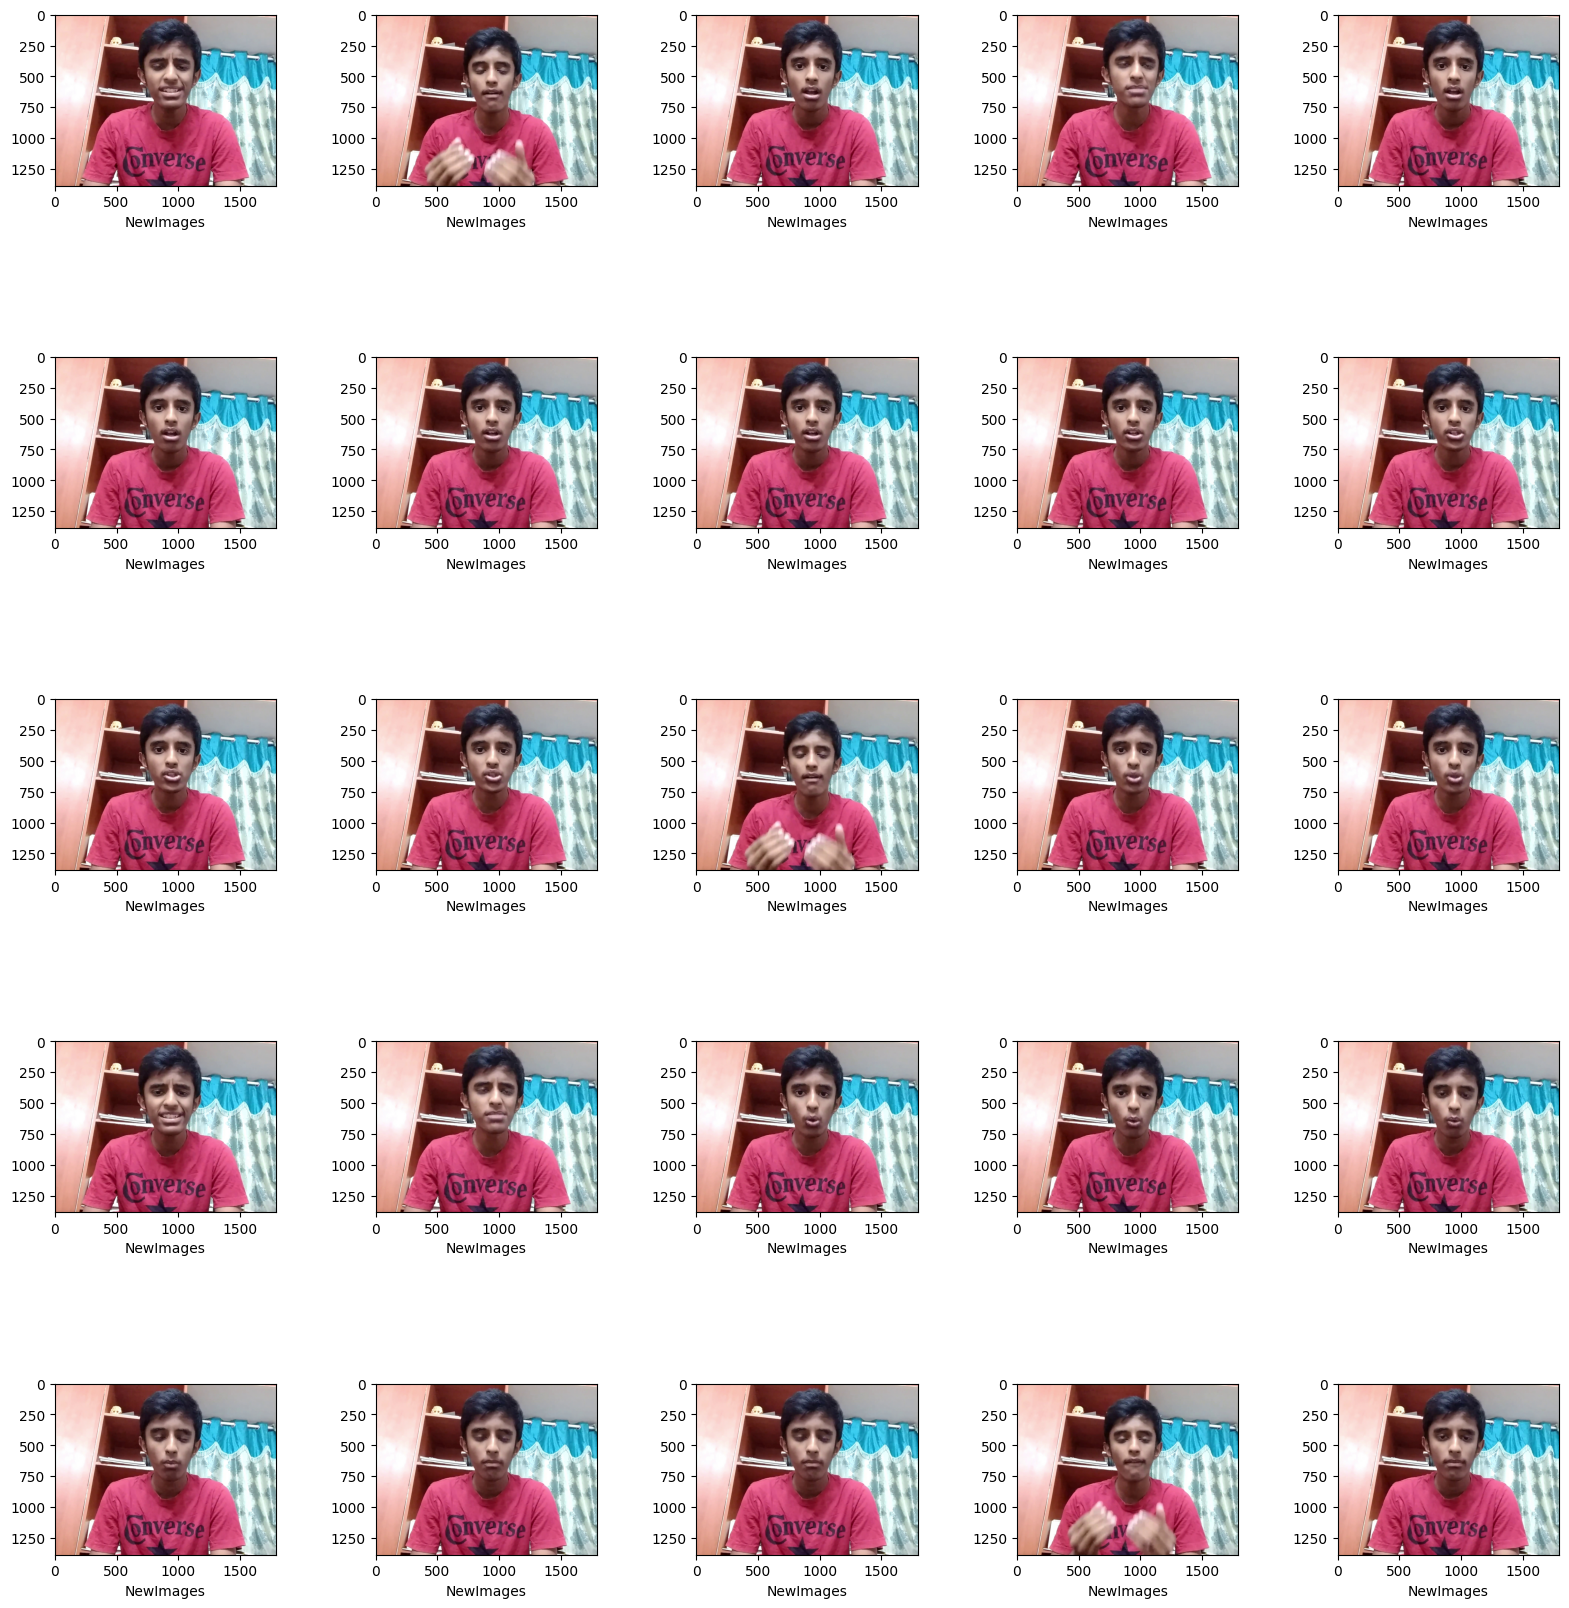

In [57]:
visualize_dataset(image_path=training_image_path, rows=5, cols=5)

In [16]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['NewImages/test\\real\\framev1_1.jpg', 'NewImages/test\\real\\framev1_10.jpg', 'NewImages/test\\real\\framev1_100.jpg', 'NewImages/test\\real\\framev1_101.jpg', 'NewImages/test\\real\\framev1_102.jpg', 'NewImages/test\\real\\framev1_103.jpg', 'NewImages/test\\real\\framev1_104.jpg', 'NewImages/test\\real\\framev1_106.jpg', 'NewImages/test\\real\\framev1_108.jpg', 'NewImages/test\\real\\framev1_11.jpg', 'NewImages/test\\real\\framev1_111.jpg', 'NewImages/test\\real\\framev1_112.jpg', 'NewImages/test\\real\\framev1_113.jpg', 'NewImages/test\\real\\framev1_114.jpg', 'NewImages/test\\real\\framev1_115.jpg', 'NewImages/test\\real\\framev1_119.jpg', 'NewImages/test\\real\\framev1_12.jpg', 'NewImages/test\\real\\framev1_120.jpg', 'NewImages/test\\real\\framev1_122.jpg', 'NewImages/test\\real\\framev1_123.jpg', 'NewImages/test\\real\\framev1_124.jpg', 'NewImages/test\\real\\framev1_125.jpg', 'NewImages/test\\real\\framev1_128.jpg', 'NewImages/test\\real\\framev1_129.jpg', 'NewImages/test\\rea

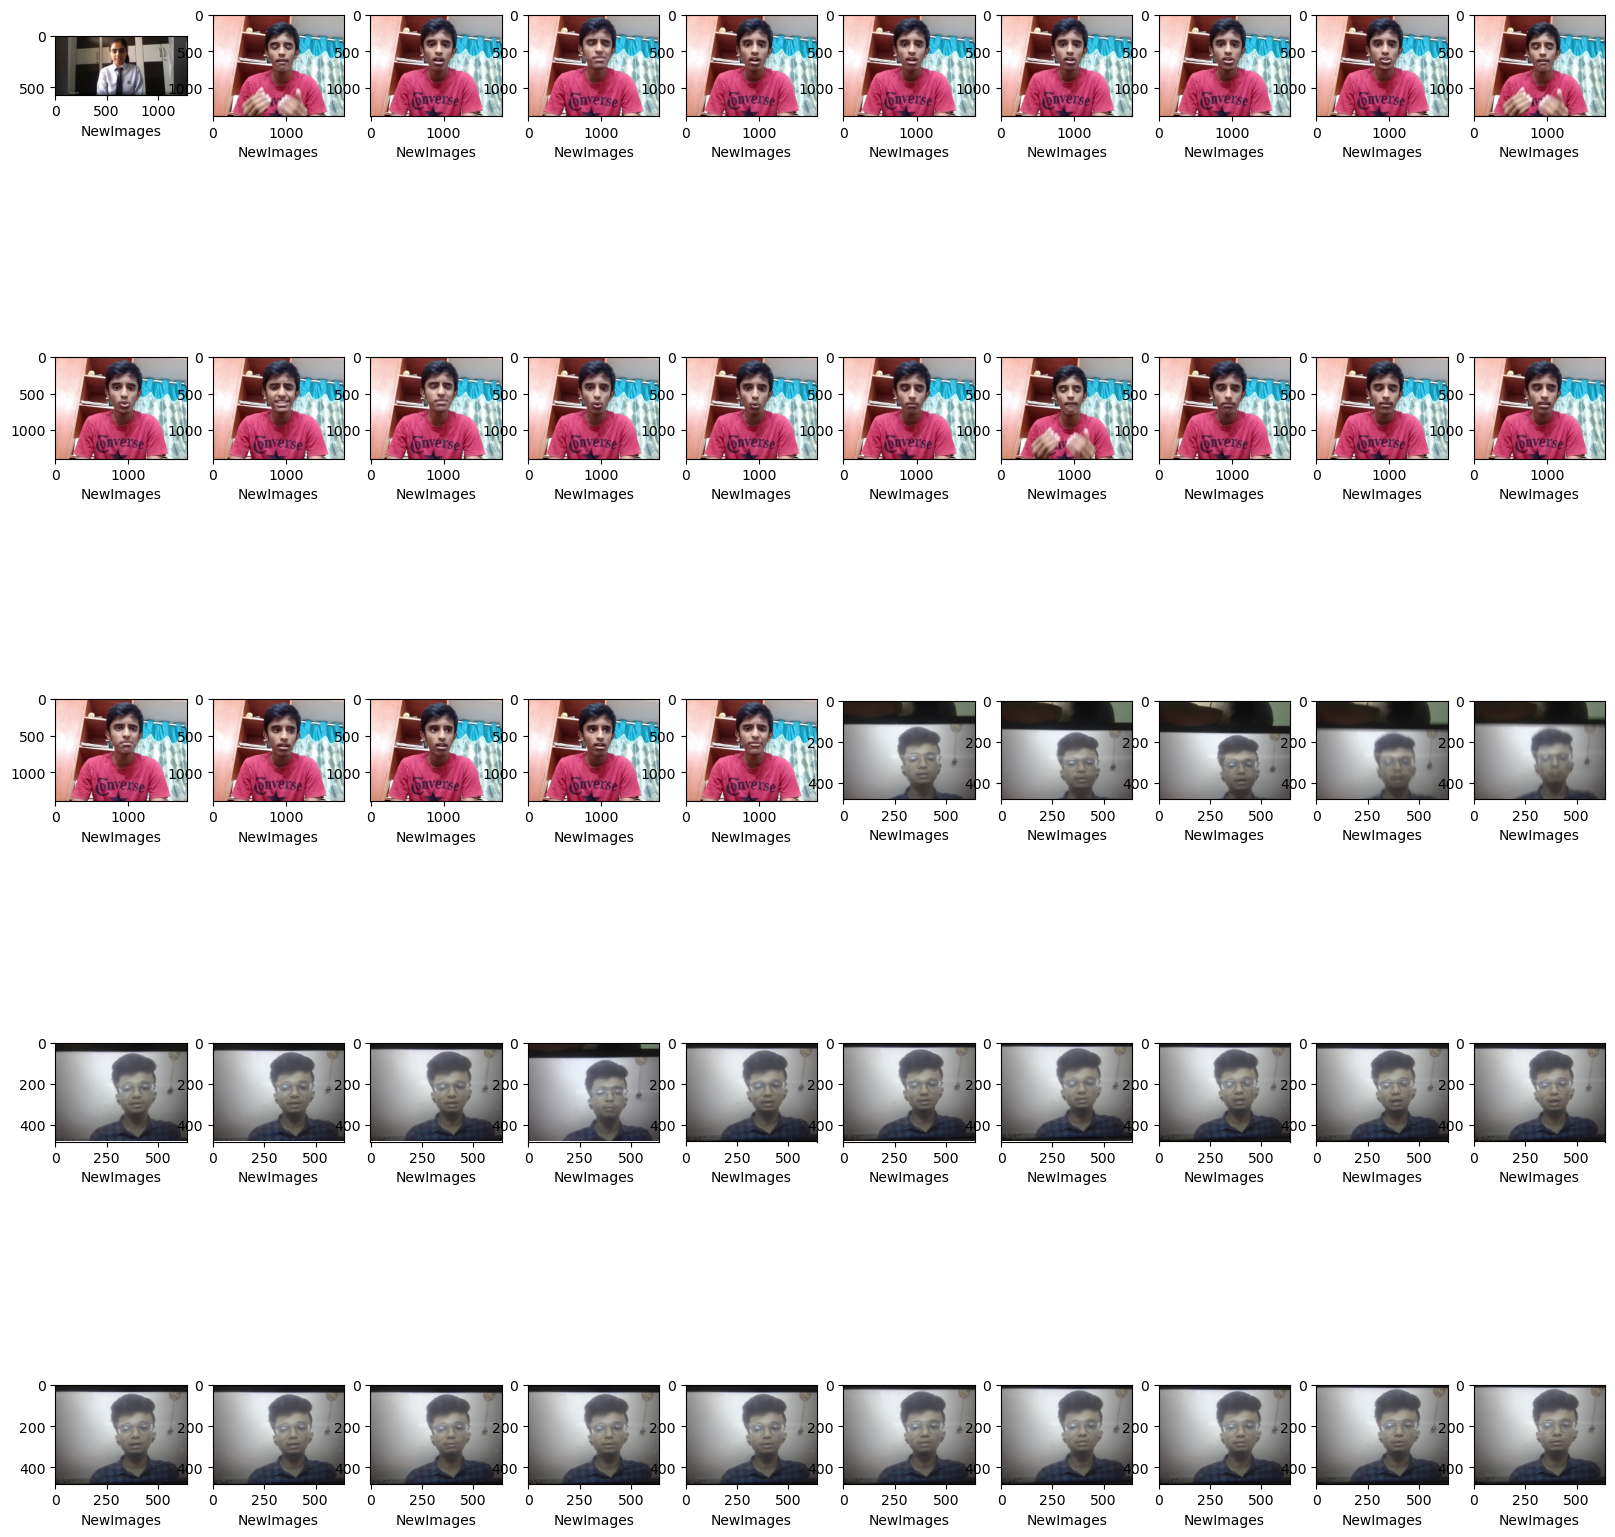

In [17]:
visualize_dataset(testing_image_path,5,10)

In [18]:
import tensorflow
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
import numpy as np


In [19]:
# Data generators for training and validation
train_datagen = ImageDataGenerator(
    brightness_range=(0.8, 1.2),
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.3,
    rescale=1./255
)

In [20]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25,
    shuffle=True
)

Found 1014 images belonging to 2 classes.


In [22]:
valid_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25
)

Found 3118 images belonging to 2 classes.


In [66]:
# Define an input layer for the sequence
sequence_input = Input(shape=(None, 160, 160, 3))  # None for sequence length

# Use MobileNetV2 as a feature extractor with TimeDistributed
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False  # Freeze the base model

# Pass the sequence input through MobileNetV2 wrapped in TimeDistributed
features = TimeDistributed(base_model)(sequence_input)
features = TimeDistributed(Flatten())(features)

# Add LSTM layer to process the sequence of extracted features
lstm_out = LSTM(128, activation='relu', return_sequences=False)(features)

# Add final Dense layers for classification
output = Dropout(0.3)(lstm_out)
output = Dense(units=8, activation='relu')(output)
prediction = Dense(1, activation='sigmoid')(output)

# Build the model
model = Model(inputs=sequence_input, outputs=prediction)


In [67]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.000001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)

In [68]:
# Checkpoints to save the best model weights
model_checkpoint = ModelCheckpoint(
    './model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5', 
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    save_best_only=True,
    save_weights_only=True
)

In [ ]:
train_dir = 'Images/train'
test_dir = 'Images/test'

# Use the custom sequence generator with the specified directories
train_sequence_generator = SequenceDataGenerator(
    directory=train_dir,
    image_data_generator=train_datagen,
    target_size=(160, 160),
    batch_size=25,
    sequence_length=sequence_length
)

valid_sequence_generator = SequenceDataGenerator(
    directory=test_dir,
    image_data_generator=valid_datagen,
    target_size=(160, 160),
    batch_size=25,
    sequence_length=sequence_length
)



In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 25,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 25,
    epochs=100,
    callbacks=[model_checkpoint]
)

In [37]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

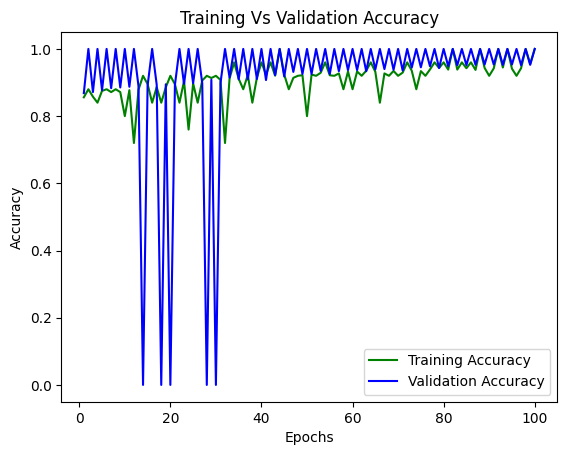

In [39]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

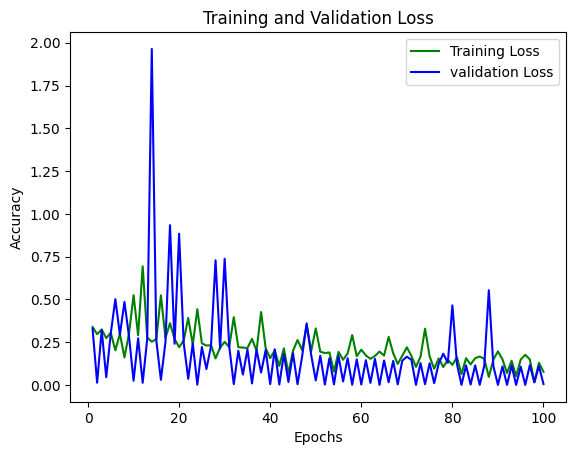

In [40]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [43]:
check_fakes(test_dir,categories[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

{'real': 41, 'spoof': 433}

In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2

# Set the sequence length
sequence_length = 10  # Adjust as needed

# Define the custom SequenceDataGenerator class
class SequenceDataGenerator(Sequence):
    def __init__(self, directory, image_data_generator, target_size, batch_size, sequence_length, color_mode='rgb', class_mode='binary'):
        self.directory = directory
        self.image_data_generator = image_data_generator
        self.target_size = target_size
        self.batch_size = batch_size
        self.sequence_length = sequence_length
        self.color_mode = color_mode
        self.class_mode = class_mode
        self.generator = image_data_generator.flow_from_directory(
            directory,
            target_size=target_size,
            color_mode=color_mode,
            class_mode=class_mode,
            batch_size=batch_size * sequence_length,  # Fetch all frames in one go
            shuffle=True
        )

    def __len__(self):
        return int(np.floor(self.generator.samples / (self.batch_size * self.sequence_length)))

    def __getitem__(self, idx):
        # Get a batch of data
        batch_x, batch_y = self.generator.next()
        
        # Reshape batch_x to (batch_size, sequence_length, height, width, channels)
        batch_x = batch_x.reshape((self.batch_size, self.sequence_length, *self.target_size, 3))
        
        # Since batch_y is already flat, reshape it to match the batch size
        batch_y = batch_y[::self.sequence_length]  # Take one label per sequence
        
        return batch_x, batch_y

# Directory paths for training and validation data
train_dir = 'Images/train'
test_dir = 'Images/test'

# Initialize data generators
train_datagen = ImageDataGenerator(
    brightness_range=(0.8,1.2),
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.3,
    rescale=1./255
)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create the sequence-based generators
train_sequence_generator = SequenceDataGenerator(
    directory=train_dir,
    image_data_generator=train_datagen,
    target_size=(160, 160),
    batch_size=25,
    sequence_length=sequence_length
)

valid_sequence_generator = SequenceDataGenerator(
    directory=test_dir,
    image_data_generator=valid_datagen,
    target_size=(160, 160),
    batch_size=25,
    sequence_length=sequence_length
)

# Define the model using MobileNetV2 with an LSTM layer
mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(sequence_length, 160, 160, 3)))
mobilenet.trainable = False

# Flatten the output from MobileNet
output = Flatten()(mobilenet.output)

# Reshape for LSTM: convert from (batch_size, flattened_features) to (batch_size, sequence_length, feature_dim)
output = Reshape((sequence_length, -1))(output)

# Apply the LSTM
output = LSTM(50)(output)

# Add Dense layers after LSTM
output = Dense(units=256, activation='relu')(output)
output = Dropout(0.3)(output)
output = Dense(units=128, activation='relu')(output)
output = Dense(units=8, activation='relu')(output)

# Final prediction layer
prediction = Dense(1, activation='sigmoid')(output)

# Compile the model
model = Model(inputs=mobilenet.input, outputs=prediction)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.000001),
    metrics=['accuracy']
)


# Model checkpoint
model_checkpoint = ModelCheckpoint(
    './model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)

# Train the model
history = model.fit(
    train_sequence_generator,
    validation_data=valid_sequence_generator,
    epochs=100,
    callbacks=[model_checkpoint]
)


In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define paths to your train and test directories
train_dir = 'Images/train'
test_dir = 'Images/test'

# Set image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 32

# Data Augmentation and Rescaling for Training and Testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Flow validation images in batches
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Define CNN model for binary classification
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Define a checkpoint callback to save the best model
# Checkpoints to save the best model weights
checkpoint = ModelCheckpoint(
    './model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5', 
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    save_best_only=True,
    save_weights_only=True
)

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Save the final model
model.save("cnn_model_real_spoof.h5")
print("Model saved as cnn_model_real_spoof.h5")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Load and predict with the saved model (optional)
# This part is to demonstrate how to load and use the saved model
loaded_model = tf.keras.models.load_model("cnn_model_real_spoof.h5")
predictions = loaded_model.predict(validation_generator)
print("Predictions on test data:", predictions)


Found 4420 images belonging to 2 classes.
Found 951 images belonging to 2 classes.


c:\Users\hanok\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\Users\hanok\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7200 - loss: 0.5276
Epoch 1: val_loss improved from inf to 0.29979, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.885776.weights.h5
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 238ms/step - accuracy: 0.7206 - loss: 0.5268 - val_accuracy: 0.8858 - val_loss: 0.2998
Epoch 2/10
  1/138 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.8750 - loss: 0.3366
Epoch 2: val_loss did not improve from 0.29979
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8750 - loss: 0.3366 - val_accuracy: 0.7826 - val_loss: 0.3856
Epoch 3/10


c:\Users\hanok\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8996 - loss: 0.2459
Epoch 3: val_loss improved from 0.29979 to 0.16297, saving model to ./model_weights/finalyearproject_antispoofing_model_03-0.940733.weights.h5
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.8996 - loss: 0.2458 - val_accuracy: 0.9407 - val_loss: 0.1630
Epoch 4/10
  1/138 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.8438 - loss: 0.2718
Epoch 4: val_loss improved from 0.16297 to 0.07680, saving model to ./model_weights/finalyearproject_antispoofing_model_04-0.956522.weights.h5
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8438 - loss: 0.2718 - val_accuracy: 0.9565 - val_loss: 0.0768
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9296 - loss: 0.1800
Epoch 5: val_loss improved from 0.07680 to 0.06622, saving model to ./model_weights/finalyearproject_antispoofing_model_05-0.985991.weights.h5
138/138 ━━━━━━━━━━━━━━━━━━━━ 30s 209ms/step - accuracy: 0.9296 - loss: 0.1800 

Model saved as cnn_model_real_spoof.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9964 - loss: 0.0277
Test Loss: 0.03516768664121628
Test Accuracy: 0.9915878176689148


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
Predictions on test data: [[9.93570805e-01]
 [1.92713723e-01]
 [9.71840382e-01]
 [9.99716222e-01]
 [2.78647531e-06]
 [9.98225629e-01]
 [9.99981701e-01]
 [9.99150157e-01]
 [3.58724577e-07]
 [1.60954678e-05]
 [9.99998212e-01]
 [2.05827248e-03]
 [1.00000000e+00]
 [1.90512495e-04]
 [9.99863267e-01]
 [9.92395163e-01]
 [2.08090711e-02]
 [9.96006310e-01]
 [1.65158542e-06]
 [1.65823963e-07]
 [4.66834724e-01]
 [4.50687279e-04]
 [9.99829531e-01]
 [2.45202973e-04]
 [9.70291018e-01]
 [9.81756866e-01]
 [3.65303749e-05]
 [9.99440610e-01]
 [1.84633289e-04]
 [2.18857807e-04]
 [9.99999940e-01]
 [9.99966085e-01]
 [9.97637987e-01]
 [1.59404427e-03]
 [8.85177585e-08]
 [9.99098778e-01]
 [9.99468565e-01]
 [9.97843683e-01]
 [9.99767005e-01]
 [7.29813753e-03]
 [9.99914229e-01]
 [5.93097918e-02]
 [9.96835649e-01]
 [9.98392344e-01]
 [9.92884099e-01]
 [9.93705332e-01]
 [5.93852565e-05]
 [9.99814630e-01]
 [3.70511203e-03]
 [1.62213782e-05]
 [9.99274433e-01]
 [1.61069314e-04

#From here is the main code

In [24]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import Sequence

class ImageSequenceGenerator(Sequence):
    def __init__(self, directory, batch_size, img_height, img_width, sequence_length, classes, shuffle=True):
        self.directory = directory
        self.batch_size = batch_size
        self.img_height = img_height
        self.img_width = img_width
        self.sequence_length = sequence_length
        self.classes = classes
        self.shuffle = shuffle
        self.files = self._get_files()
        self.on_epoch_end()

    def _get_files(self):
        # Get all files in the directory with labels
        files = []
        for class_index, class_name in enumerate(self.classes):
            class_dir = os.path.join(self.directory, class_name)
            for fname in os.listdir(class_dir):
                file_path = os.path.join(class_dir, fname)
                files.append((file_path, class_index))
        return files

    def __len__(self):
        # Number of batches per epoch
        return len(self.files) // (self.batch_size * self.sequence_length)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.files)

    def __getitem__(self, index):
        # Generate one batch of data
        X = []
        y = []
        for i in range(self.batch_size):
            sequence_images = []
            for j in range(self.sequence_length):
                img_path, label = self.files[index * self.batch_size * self.sequence_length + i * self.sequence_length + j]
                img = cv2.imread(img_path)
                img = cv2.resize(img, (self.img_width, self.img_height))
                img = img / 255.0  # Normalize
                sequence_images.append(img)
            X.append(sequence_images)
            y.append(label)
        
        return np.array(X), np.array(y)

# Initialize sequence generator
train_sequence_generator = ImageSequenceGenerator(
    directory="C:/Users/91801/Downloads/NewImages/NewImages/train",
    batch_size=4,
    img_height=128,
    img_width=128,
    sequence_length=5,  # Sequence length for LSTM input
    classes=["real", "spoof"],
    shuffle=True
)

validation_sequence_generator = ImageSequenceGenerator(
    directory="C:/Users/91801/Downloads/NewImages/NewImages/train",
    batch_size=4,
    img_height=128,
    img_width=128,
    sequence_length=5,
    classes=["real", "spoof"],
    shuffle=False
)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM

# Define CNN-LSTM model
sequence_length = 5  # This should match the sequence length in the generator
img_height=128
img_width=128
model = Sequential()

# TimeDistributed CNN Layers
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), 
                          input_shape=(sequence_length, img_height, img_width, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Flatten()))

# LSTM layer
model.add(LSTM(128, activation='tanh', return_sequences=False))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\91801\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 5, 128, 128,    │           896 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 64, 64, 32)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 5, 64, 64, 64)  │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 5, 32, 32, 64)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 5, 32, 32, 128) │        73,856 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 5, 16, 16, 128) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 5, 32768)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    16,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,944,833 (64.64 MB)

 Trainable params: 16,944,833 (64.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Checkpoints to save the best model weights
checkpoint = ModelCheckpoint(
    './model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5', 
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    save_best_only=True,
    save_weights_only=True
)

# Train the model
epochs = 10
history = model.fit(
    train_sequence_generator,
    validation_data=validation_sequence_generator,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Save the final model
model.save("cnn_lstm_model_real_spoof.h5")
print("Model saved as cnn_lstm_model_real_spoof.h5")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_sequence_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
#run this for ouptut

import cv2
import numpy as np
import tensorflow as tf
from collections import deque

# Load the trained CNN-LSTM model
model = tf.keras.models.load_model("cnn_lstm_model_real_spoof.h5")

# Set parameters
sequence_length = 5  # Must match the sequence length used during training
img_height, img_width = 128, 128  # Must match the image size used during training
frame_queue = deque(maxlen=sequence_length)  # Queue to hold the sequence of frames

# Initialize webcam
cap = cv2.VideoCapture(0)

def preprocess_frame(frame):
    """Preprocess a single frame for prediction."""
    # Resize frame to the model's expected input size
    frame = cv2.resize(frame, (img_width, img_height))
    # Normalize the image
    frame = frame / 255.0
    return frame

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the current frame
    processed_frame = preprocess_frame(frame)
    frame_queue.append(processed_frame)

    # Check if we have enough frames in the queue to make a prediction
    if len(frame_queue) == sequence_length:
        # Prepare the sequence as a batch of shape (1, sequence_length, img_height, img_width, 3)
        sequence = np.array([frame_queue])
        
        # Get the prediction
        prediction = model.predict(sequence)[0][0]  # Get the first (and only) batch's prediction

        # Interpret the prediction
        label = "Real" if prediction < 0.6 else "Spoof"
        color = (0, 255, 0) if label == "Real" else (0, 0, 255)  # Green for real, red for spoof

        # Display the result on the frame
        cv2.putText(frame, f"Prediction: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Show the frame
    cv2.imshow("Live Spoof Detection", frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [1]:
import cv2
import os

# Specify the folder path where the images will be saved
output_folder = "NewImages\\train\\spoof\\v8"
# "C:\Users\edlaa\OneDrive\Desktop\final_antispoofing\train\real\Bennu"

os.makedirs(output_folder, exist_ok=True)

# Start the video capture (0 is typically the built-in camera)
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Display instructions to the user
print("Press 's' to start capturing images.")
while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame.")
        break

    # Display the frame with a message to start
    cv2.putText(frame, 'Press "s" to start capturing', (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Capture', frame)

    # Wait for 's' to be pressed
    if cv2.waitKey(1) & 0xFF == ord('s'):
        print("Starting image capture...")
        break

# Set the number of images to capture
num_images = 300
count = 0

# Start capturing images
while count < num_images:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame.")
        break

    # Display the captured frame
    cv2.imshow('Capture', frame)

    # Save the frame as an image file
    image_path = os.path.join(output_folder, f'image_{count:03d}.jpg')
    cv2.imwrite(image_path, frame)
    count += 1

    # Wait for a short time and check if 'q' is pressed to quit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        print("Capture stopped by user.")
        break

print(f"{count} images were saved to '{output_folder}'.")

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()

Press 's' to start capturing images.
Starting image capture...
300 images were saved to 'NewImages\train\spoof\v8'.


In [ ]:
import cv2
import os

# Define the path to the directory containing videos and the output directory
video_directory = 'Videos'
output_directory = 'NewImages/train/real'

# Number of frames to extract per video
frames_to_extract = 300

# Ensure output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop through each video file
for video_file in sorted(os.listdir(video_directory)):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_directory, video_file)
        video_name = os.path.splitext(video_file)[0]

        # Create a directory for each video in the output directory
        video_output_dir = os.path.join(output_directory, video_name)
        if not os.path.exists(video_output_dir):
            os.makedirs(video_output_dir)

        # Open the video file
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_interval = max(frame_count // frames_to_extract, 1)  # Interval between frames to capture

        frame_idx = 0
        saved_frames = 0

        while cap.isOpened() and saved_frames < frames_to_extract:
            ret, frame = cap.read()
            if not ret:
                break
            if frame_idx % frame_interval == 0:
                # Save the frame as an image file
                frame_filename = os.path.join(video_output_dir, f'frame_{saved_frames:03d}.jpg')
                cv2.imwrite(frame_filename, frame)
                saved_frames += 1
            frame_idx += 1

        cap.release()

print("Frames extracted and saved.")
